In [8]:
import cirq
import numpy as np
import matplotlib.pyplot as plt

#3 qubit x rotation
#THIS IS AN ENTANGLING GATE - ALL QUBITS WILL MEASURE THE SAME
def rotation3X(q0, q1, q2, angle):
    a = cirq.NamedQubit("A")
    yield cirq.H(q0), cirq.H(q1), cirq.H(q2)
    yield cirq.CNOT(q0, a)
    yield cirq.CNOT(q1, a)
    yield cirq.CNOT(q2, a)
    yield cirq.rz(2 * angle)(a)
    yield cirq.CNOT(q2, a)
    yield cirq.CNOT(q1, a)
    yield cirq.CNOT(q0, a)
    yield cirq.H(q0), cirq.H(q1), cirq.H(q2)
    
    #For this project
    yield cirq.measure(q[0],key='q0')
    yield cirq.measure(q[1],key='q1')
    yield cirq.measure(q[2],key='q2')

In [9]:
#Build
q = cirq.LineQubit.range(3)
circuit = cirq.Circuit(rotation3X(q[0],q[1],q[2],np.pi/2))
print(circuit)

                                  ┌──┐   ┌────────┐
0: ───H───@───────────────────────────────@───────────H─────────M('q0')───
          │                               │
1: ───H───┼───@────────────────────@──────┼H──────────M('q1')─────────────
          │   │                    │      │
2: ───H───┼───┼───@───────────@────┼H─────┼M('q2')────────────────────────
          │   │   │           │    │      │
A: ───────X───X───X───Rz(π)───X────X──────X───────────────────────────────
                                  └──┘   └────────┘


In [10]:
#Simulation set up
sim = cirq.Simulator()
goal_circuit = cirq.Circuit(rotation3X(q[0],q[1],q[2],np.pi/2))
goal_state = sim.run(goal_circuit) #always 111
lcount = 100
step = 16

In [11]:
angle = np.array([])
pgoal = np.array([])

for x in range(step * 2):
    #increments of 1/8th up to 2 pi
    radian = np.pi * x / step
    #add new entry to x range
    angle = np.append(angle,radian)
    #generate new circuit
    circuit = cirq.Circuit(rotation3X(q[0],q[1],q[2],radian))
    check = 0
    #test the circuit
    for y in range(lcount):
        state = sim.run(circuit)
        if state == goal_state:
            check += 1
    #add corresponding probability to y range
    pgoal = np.append(pgoal, check/lcount)


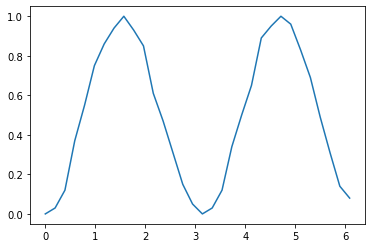

In [12]:
plt.plot(angle,pgoal)